#  Sai Rohith Enumala

## Research question/interests

We are interested in Toronto's Airbnb listings (dataset) as it contains a multitude of elements including neighborhoods, pricing, ratings, and whether or not the host is a super host. 

Research Question: 

I want to analyse whether the category of hosts have a jounce on the prices of the listings, based on the number of people it accomodates.

I also want to analysie,on average, which of the two categories of hosts tends to keep the property (listing) clean, based on the cleanliness reviews by the customers.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv ("../data/raw/listings.csv")

In [3]:
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20210806113117,2021-08-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.09
1,8077,https://www.airbnb.com/rooms/8077,20210806113117,2021-08-07,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.56
2,23691,https://www.airbnb.com/rooms/23691,20210806113117,2021-08-07,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,...,4.93,4.34,4.73,NaN,t,2,0,2,0,1.79
3,27423,https://www.airbnb.com/rooms/27423,20210806113117,2021-08-07,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,118124,https://www.airbnb.com/users/show/118124,...,5.00,4.82,4.82,NaN,f,1,1,0,0,0.21
4,28160,https://www.airbnb.com/rooms/28160,20210806113117,2021-08-06,"Safe, Central, Quiet and Great Amenities!",NaN,Simply the best and safest neighbourhood in T....,https://a0.muscache.com/pictures/166666/71e95e...,86838,https://www.airbnb.com/users/show/86838,...,5.00,5.00,4.86,NaN,f,1,1,0,0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,51492931,https://www.airbnb.com/rooms/51492931,20210806113117,2021-08-06,Spacious Studio Apartment Downtown Toronto Sma...,Very spacious cozy studio apartment. Located r...,The Kensington neighbourhood is defined by its...,https://a0.muscache.com/pictures/e7a25a9c-f8df...,311805447,https://www.airbnb.com/users/show/311805447,...,NaN,NaN,NaN,NaN,f,6,6,0,0,NaN
15080,51493223,https://www.airbnb.com/rooms/51493223,20210806113117,2021-08-06,Elegant One Bedroom Condo in Core Downtown,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/e90918d6-9268...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
15081,51493266,https://www.airbnb.com/rooms/51493266,20210806113117,2021-08-07,Bright large 2 bedrooms apt with separate entr...,Bright large 2 bedrooms apt with separate entr...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,259499767,https://www.airbnb.com/users/show/259499767,...,NaN,NaN,NaN,STR-2009-UDFHGC,f,5,3,2,0,NaN
15082,51493385,https://www.airbnb.com/rooms/51493385,20210806113117,2021-08-06,2 BR Condo Downtown with CN Tower View,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/f921100f-37dd...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,STR-2011-GDQKVF,f,4,4,0,0,NaN


# MILESTONE 3

### Task-1: Data Analysis

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [5]:
df.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15084 entries, 0 to 15083
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15084 non-null  int64  
 1   listing_url                                   15084 non-null  object 
 2   scrape_id                                     15084 non-null  int64  
 3   last_scraped                                  15084 non-null  object 
 4   name                                          15083 non-null  object 
 5   description                                   14598 non-null  object 
 6   neighborhood_overview                         9326 non-null   object 
 7   picture_url                                   15084 non-null  object 
 8   host_id                                       15084 non-null  int64  
 9   host_url                                      15084 non-null 

In [7]:
df.describe(include='float64')

,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,15077.000000,15077.000000,0.0,15084.000000,15084.000000,0.0,13945.000000,14873.000000,15084.000000,1.508400e+04,0.0,11609.000000,11435.000000,11437.000000,11434.000000,11434.000000,11433.000000,11434.000000,11609.000000
mean,5.689593,5.689593,NaN,43.681463,-79.397382,NaN,1.444532,1.645263,27.492761,4.942609e+05,NaN,4.650082,4.780028,4.679526,4.835753,4.837102,4.825204,4.694973,1.340099
std,18.884768,18.884768,NaN,0.048682,0.065256,NaN,0.824944,1.107654,39.570448,3.135789e+07,NaN,0.725082,0.430746,0.510812,0.383327,0.406078,0.336104,0.460011,3.584430
min,0.000000,0.000000,NaN,43.586740,-79.622620,NaN,1.000000,0.000000,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1.000000,1.000000,NaN,43.645490,-79.425860,NaN,1.000000,1.000000,28.000000,3.650000e+02,NaN,4.630000,4.750000,4.590000,4.830000,4.840000,4.780000,4.630000,0.160000
50%,1.000000,1.000000,NaN,43.663165,-79.397250,NaN,1.000000,1.000000,28.000000,1.125000e+03,NaN,4.840000,4.910000,4.840000,4.960000,4.970000,4.930000,4.810000,0.510000
75%,4.000000,4.000000,NaN,43.702235,-79.376487,NaN,2.000000,2.000000,28.000000,1.125000e+03,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.430000
max,272.000000,272.000000,NaN,43.833170,-79.119670,NaN,9.000000,13.000000,1125.000000,2.147484e+09,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,144.000000


In [8]:
df.describe(include='object').T

,count,unique,top,freq
listing_url,15084,15084,https://www.airbnb.com/rooms/1419,1
last_scraped,15084,2,2021-08-06,9702
name,15083,14742,Private room in a shared hostel suite downtown,8
description,14598,14018,Whether you are just getting away for the week...,12
neighborhood_overview,9326,7850,The lively Entertainment District lives up to ...,60
picture_url,15084,14646,https://a0.muscache.com/pictures/5b42a820-a046...,12
host_url,15084,9864,https://www.airbnb.com/users/show/10202618,71
host_name,15077,4740,David,105
host_since,15077,3272,2013-11-23,73
host_location,15070,336,"Toronto, Ontario, Canada",11048


In [9]:
df_temp = df[["id", 'name', 'host_id', 'host_name', 'host_is_superhost','price','review_scores_cleanliness','accommodates' ]]
df_temp


,id,name,host_id,host_name,host_is_superhost,price,review_scores_cleanliness,accommodates
0,1419,Beautiful home in amazing area!,1565,Alexandra,f,$469.00,5.00,10
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,f,$94.00,4.89,2
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,f,$72.00,4.82,3
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,f,$45.00,4.82,1
4,28160,"Safe, Central, Quiet and Great Amenities!",86838,Rita,f,$75.00,4.86,1
...,...,...,...,...,...,...,...,...
15079,51492931,Spacious Studio Apartment Downtown Toronto Sma...,311805447,Anthony,f,$71.00,NaN,2
15080,51493223,Elegant One Bedroom Condo in Core Downtown,416677873,Debashis,f,$109.00,NaN,2
15081,51493266,Bright large 2 bedrooms apt with separate entr...,259499767,Sue,f,$106.00,NaN,4
15082,51493385,2 BR Condo Downtown with CN Tower View,416677873,Debashis,f,$263.00,NaN,5


In [10]:
df_temp.head()


,id,name,host_id,host_name,host_is_superhost,price,review_scores_cleanliness,accommodates
0,1419,Beautiful home in amazing area!,1565,Alexandra,f,$469.00,5.00,10
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,f,$94.00,4.89,2
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,f,$72.00,4.82,3
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,f,$45.00,4.82,1
4,28160,"Safe, Central, Quiet and Great Amenities!",86838,Rita,f,$75.00,4.86,1


In [11]:
 df_temp[['price']].describe(include="object")
    


,price
count,15084
unique,620
top,$100.00
freq,501


In [12]:
df_temp[['review_scores_cleanliness']].describe(include='float64')

,review_scores_cleanliness
count,11437.000000
mean,4.679526
std,0.510812
min,0.000000
25%,4.590000
50%,4.840000
75%,5.000000
max,5.000000


In [13]:
 df_temp.describe(include='object').T
    


,count,unique,top,freq
name,15083,14742,Private room in a shared hostel suite downtown,8
host_name,15077,4740,David,105
host_is_superhost,15077,2,f,11134
price,15084,620,$100.00,501


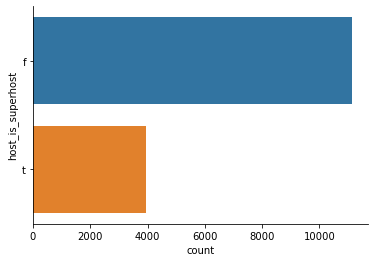

In [14]:

sns.countplot(y='host_is_superhost',data=df_temp)
sns.despine()

<function matplotlib.pyplot.show(close=None, block=None)>

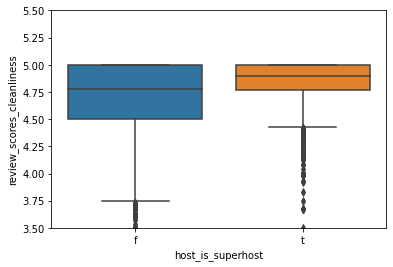

In [15]:
sns.boxplot(x='host_is_superhost',y='review_scores_cleanliness',data=df_temp)
plt.ylim(3.5, 5.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

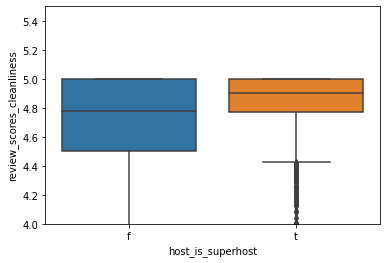

In [16]:
sns.boxplot(x='host_is_superhost',y='review_scores_cleanliness',data=df_temp)
plt.ylim(4, 5.5)
plt.show

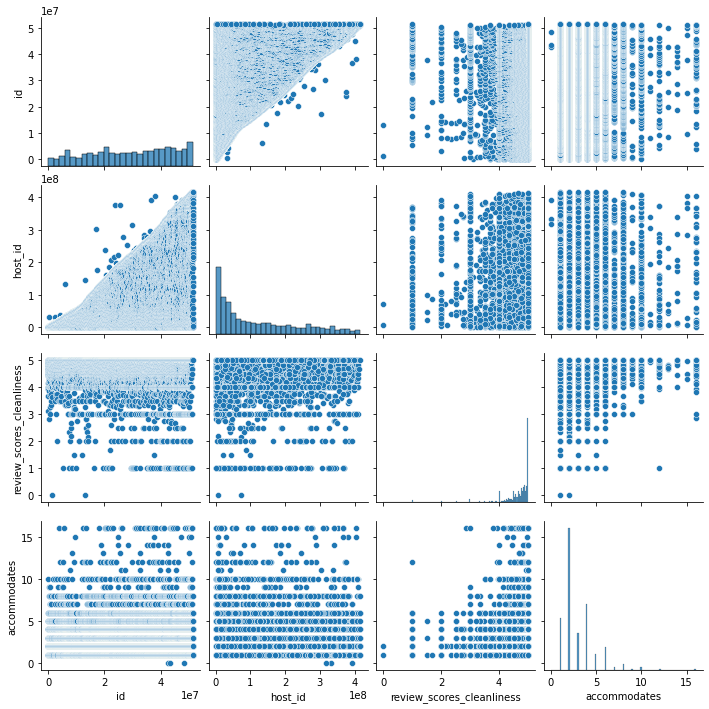

In [17]:
sns.pairplot(df_temp)

In [18]:
df_temp['host_is_superhost'].describe(include ='object')

count     15077
unique        2
top           f
freq      11134
Name: host_is_superhost, dtype: object

In [19]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15084 entries, 0 to 15083
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         15084 non-null  int64  
 1   name                       15083 non-null  object 
 2   host_id                    15084 non-null  int64  
 3   host_name                  15077 non-null  object 
 4   host_is_superhost          15077 non-null  object 
 5   price                      15084 non-null  object 
 6   review_scores_cleanliness  11437 non-null  float64
 7   accommodates               15084 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 942.9+ KB


In [20]:
df['host_id'].unique

<bound method Series.unique of 0             1565
1            22795
2            93825
3           118124
4            86838
           ...    
15079    311805447
15080    416677873
15081    259499767
15082    416677873
15083    344709977
Name: host_id, Length: 15084, dtype: int64>

In [21]:
df['neighbourhood'].unique

<bound method Series.unique of 0        Toronto, Ontario, Canada
1                             NaN
2                             NaN
3                             NaN
4        Toronto, Ontario, Canada
                   ...           
15079    Toronto, Ontario, Canada
15080                         NaN
15081                         NaN
15082                         NaN
15083    Toronto, Ontario, Canada
Name: neighbourhood, Length: 15084, dtype: object>

### Task-2: Analysis Pipeline

#### Loading and cleaning data

In [22]:
df = pd.read_csv ("../data/raw/listings.csv")
df1 = df[["id", 'name', 'host_id', 'host_name', 'host_is_superhost','price','review_scores_cleanliness','accommodates' ]].sort_values("review_scores_cleanliness",ascending=False, ignore_index=True)


df1


,id,name,host_id,host_name,host_is_superhost,price,review_scores_cleanliness,accommodates
0,1419,Beautiful home in amazing area!,1565,Alexandra,f,$469.00,5.0,10
1,32735994,New Modern Downtown 1 Bedroom Apt Prime Location,9923100,Ed,t,$82.00,5.0,2
2,32814111,King Bed CN Tower Suite w/Balcony 2TV’S & Parking,212832355,Alan Owner Of Luxury Residences,t,$300.00,5.0,4
3,32811056,"Private, Spacious w/Kitchen & Laundry by Greek...",58473437,Jenny,t,$95.00,5.0,4
4,32793995,"Furnished room in friendly, nice and quiet house.",133665417,Ray,f,$45.00,5.0,1
...,...,...,...,...,...,...,...,...
15079,51492931,Spacious Studio Apartment Downtown Toronto Sma...,311805447,Anthony,f,$71.00,NaN,2
15080,51493223,Elegant One Bedroom Condo in Core Downtown,416677873,Debashis,f,$109.00,NaN,2
15081,51493266,Bright large 2 bedrooms apt with separate entr...,259499767,Sue,f,$106.00,NaN,4
15082,51493385,2 BR Condo Downtown with CN Tower View,416677873,Debashis,f,$263.00,NaN,5


#### Process data for review clean

In [23]:

clean = df1[['host_is_superhost','review_scores_cleanliness']]

clean.isnull().sum()


host_is_superhost               7
review_scores_cleanliness    3647
dtype: int64

In [24]:
clean =  clean[clean['review_scores_cleanliness'].notna()]
clean = clean[clean['host_is_superhost'].notna()]
clean

,host_is_superhost,review_scores_cleanliness
0,f,5.0
1,t,5.0
2,t,5.0
3,t,5.0
4,f,5.0
...,...,...
11432,f,1.0
11433,f,1.0
11434,f,1.0
11435,f,0.0


In [25]:
cleanmean = clean.groupby("host_is_superhost", as_index=False).mean()
cleanmean

,host_is_superhost,review_scores_cleanliness
0,f,4.605607
1,t,4.837693


#### process data for price


In [26]:
pr = df1[['host_is_superhost', 'accommodates', 'price']]
pr.isnull().sum()
# the above line of code is extracted from https://www.kaggle.com/nikhilkumarmutyala/airbnb-data-visualization-for-classification

host_is_superhost    7
accommodates         0
price                0
dtype: int64

In [27]:
pr = pr[pr['host_is_superhost'].notna()]
pr['price'] = pr['price'].str.replace('$','')
pr['price'] = pr['price'].str.replace(',','')
pr['price'] = pr.price.astype(float)
price_processed = pr.groupby(["host_is_superhost","accommodates"],as_index=False).mean()
price_processed.drop(price_processed[price_processed['price']==0].index, inplace=True)

price_processed

C:\Users\Rohith\AppData\Local\Temp/ipykernel_9736/3059147973.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pr['price'] = pr['price'].str.replace('$','')


,host_is_superhost,accommodates,price
1,f,1,86.083049
2,f,2,125.405508
3,f,3,148.457384
4,f,4,188.607746
5,f,5,214.183673
6,f,6,284.306011
7,f,7,256.096154
8,f,8,444.367568
9,f,9,449.083333
10,f,10,390.434783


#### Wrangle Data

In [28]:

cleanmean = cleanmean.rename(columns = {"host_is_superhost" : "Is_Super_Host", "review_scores_cleanliness": "mean of cleanliness review"})
cleanmean['Is_Super_Host'] = cleanmean.Is_Super_Host.replace({'t':'Super host', 'f':'normal host'})
# The above line of code is extracted from https://www.kite.com/python/answers/how-to-replace-column-values-in-a-pandas-dataframe-in-python#:~:text=Access%20a%20specific%20pandas.,old%20values%20to%20new%20values.
cleanmean

,Is_Super_Host,mean of cleanliness review
0,normal host,4.605607
1,Super host,4.837693


In [29]:
price_processed = price_processed.rename(columns = {'price' :"mean of the prices"})
price_processed['host_is_superhost'] = price_processed.host_is_superhost.replace({'t':'Super host', 'f':'normal host'})
# The above line of code is extracted from https://www.kite.com/python/answers/how-to-replace-column-values-in-a-pandas-dataframe-in-python#:~:text=Access%20a%20specific%20pandas.,old%20values%20to%20new%20values.
price_processed

,host_is_superhost,accommodates,mean of the prices
1,normal host,1,86.083049
2,normal host,2,125.405508
3,normal host,3,148.457384
4,normal host,4,188.607746
5,normal host,5,214.183673
6,normal host,6,284.306011
7,normal host,7,256.096154
8,normal host,8,444.367568
9,normal host,9,449.083333
10,normal host,10,390.434783


### Task-3: Method Chaining

In [30]:
import project_functions1 as p1
data = "../data/raw/listings.csv"
df3 = p1.unprocessed(data)


In [31]:
df13,clean3,price3 = p1.load(data)
df13

,id,name,host_id,host_name,host_is_superhost,price,review_scores_cleanliness,accommodates
0,1419,Beautiful home in amazing area!,1565,Alexandra,f,$469.00,5.0,10
1,32735994,New Modern Downtown 1 Bedroom Apt Prime Location,9923100,Ed,t,$82.00,5.0,2
2,32814111,King Bed CN Tower Suite w/Balcony 2TV’S & Parking,212832355,Alan Owner Of Luxury Residences,t,$300.00,5.0,4
3,32811056,"Private, Spacious w/Kitchen & Laundry by Greek...",58473437,Jenny,t,$95.00,5.0,4
4,32793995,"Furnished room in friendly, nice and quiet house.",133665417,Ray,f,$45.00,5.0,1
...,...,...,...,...,...,...,...,...
15079,51492931,Spacious Studio Apartment Downtown Toronto Sma...,311805447,Anthony,f,$71.00,NaN,2
15080,51493223,Elegant One Bedroom Condo in Core Downtown,416677873,Debashis,f,$109.00,NaN,2
15081,51493266,Bright large 2 bedrooms apt with separate entr...,259499767,Sue,f,$106.00,NaN,4
15082,51493385,2 BR Condo Downtown with CN Tower View,416677873,Debashis,f,$263.00,NaN,5


In [32]:
clean3

,host_is_superhost,review_scores_cleanliness
0,f,5.0
1,t,5.0
2,t,5.0
3,t,5.0
4,f,5.0
...,...,...
11432,f,1.0
11433,f,1.0
11434,f,1.0
11435,f,0.0


In [33]:
price3

,host_is_superhost,accommodates,price
0,f,10,$469.00
1,t,2,$82.00
2,t,4,$300.00
3,t,4,$95.00
4,f,1,$45.00
...,...,...,...
15079,f,2,$71.00
15080,f,2,$109.00
15081,f,4,$106.00
15082,f,5,$263.00


In [34]:
cleanmean3 = p1.process_clean(clean3)
cleanmean3

,host_is_superhost,review_scores_cleanliness
0,f,4.605607
1,t,4.837693


In [35]:
price_procs3 = p1.process_price(price3)

C:\Users\Rohith\data301\project-group11-project\notebooks\project_functions1.py:34: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pr['price'] =  (  pr['price']


In [36]:
price_procs3

,host_is_superhost,accommodates,price
1,f,1,86.083049
2,f,2,125.405508
3,f,3,148.457384
4,f,4,188.607746
5,f,5,214.183673
6,f,6,284.306011
7,f,7,256.096154
8,f,8,444.367568
9,f,9,449.083333
10,f,10,390.434783


In [37]:
cleanmean3 = p1.wrang_clean(cleanmean3)
cleanmean3

,Is_Super_Host,mean of cleanliness score
0,normal host,4.605607
1,Super host,4.837693


In [38]:
price_processed3 = p1.wrang_price(price_procs3)
price_processed3

,host_is_superhost,accommodates,mean of the prices
1,normal host,1,86.083049
2,normal host,2,125.405508
3,normal host,3,148.457384
4,normal host,4,188.607746
5,normal host,5,214.183673
6,normal host,6,284.306011
7,normal host,7,256.096154
8,normal host,8,444.367568
9,normal host,9,449.083333
10,normal host,10,390.434783


### Task-4: Data Visualization 

##### On average, which of the two categories of hosts tend to keep the property (listing) clean, based on the cleanliness reviews by the customers?

First, we will see the count of super hosts and normal hosts who have received a cleanliness review score.

(3000.0, 7900.0)

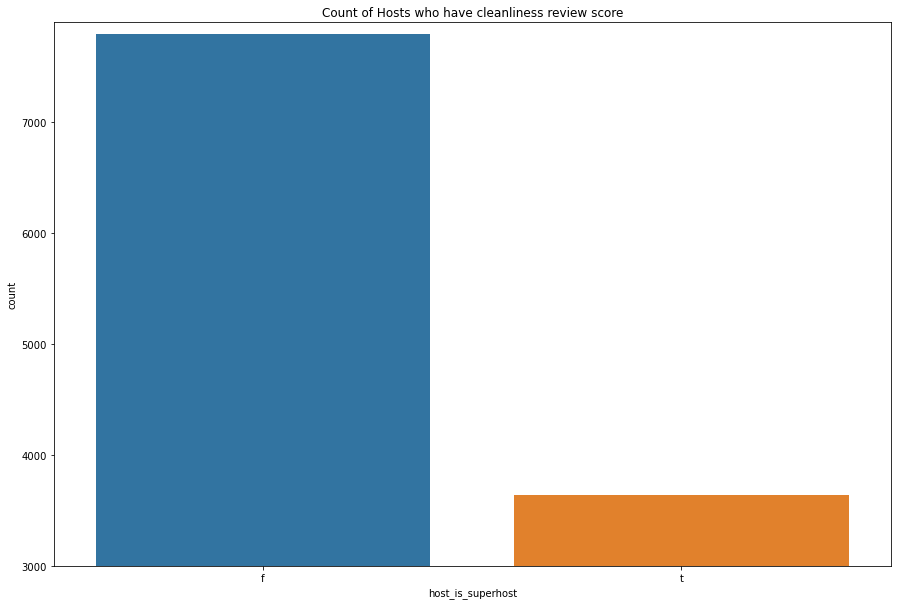

In [39]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'host_is_superhost', data = clean3).set(title = 'Count of Hosts who have cleanliness review score')
plt.ylim(3000,7900)


From the above bar plot, we can see that the count of normal hosts, who have received the cleanliness review score in Toronto, is four times overly than the count of super hosts who have received a cleanliness review score.

Now, we will compare the mean of cleanliness score of both the category of the host to decide, which category of host keeps the property immaculate. 

(4.0, 5.0)

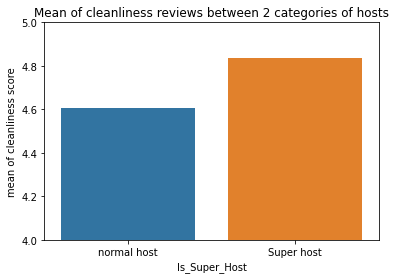

In [40]:

sns.barplot(x='Is_Super_Host',y='mean of cleanliness score',data=cleanmean3).set(title ='Mean of cleanliness reviews between 2 categories of hosts')
plt.ylim(4,5)

Even though the count of normal hosts, who have received the cleanliness score overcounted than the super hosts, we can see that the mean cleanliness score of the super hosts is over and above the mean cleanliness score of normal hosts. From this, we can consummate that super hosts tend to keep the property (listing) clean, compared to normal hosts, based on the cleanliness reviews by the customers, in Toronto.

##### Does the category of hosts have a jounce on the prices of the listings, based on the number of people it accomodates?

Let us look at the count of Number of listings of super hosts and normal hosts based on accommodation size, before we move on to compare the prices between the two categories of hosts.

[Text(0.5, 1.0, 'Count of Listings based on accomodation size of both categories of hosts'),
 Text(0, 0.5, 'No.of Listings')]

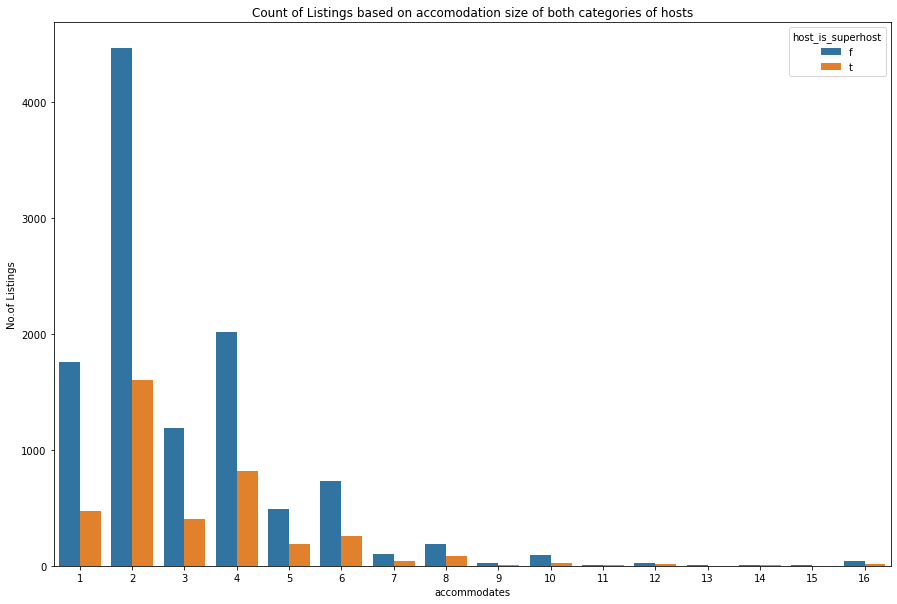

In [41]:

price_temp = price3.groupby(["accommodates", "host_is_superhost"], as_index = False).count()
price_temp.drop(price_temp[price_temp['accommodates']==0].index, inplace=True)
plt.figure(figsize = (15,10))

sns.barplot(x='accommodates',y='price',data=price_temp, hue = "host_is_superhost").set(title ='Count of Listings based on accomodation size of both categories of hosts', ylabel = "No.of Listings")

We can see that the listings of normal hosts overcounted or as same as the count of listings of super hosts in Toronto (Based on accommodation size).

Now, we will compare the mean of prices based on accomidation size between two categories of hosts.

[Text(0.5, 1.0, 'Mean of the prices based on accomodation size of both categories of hosts')]

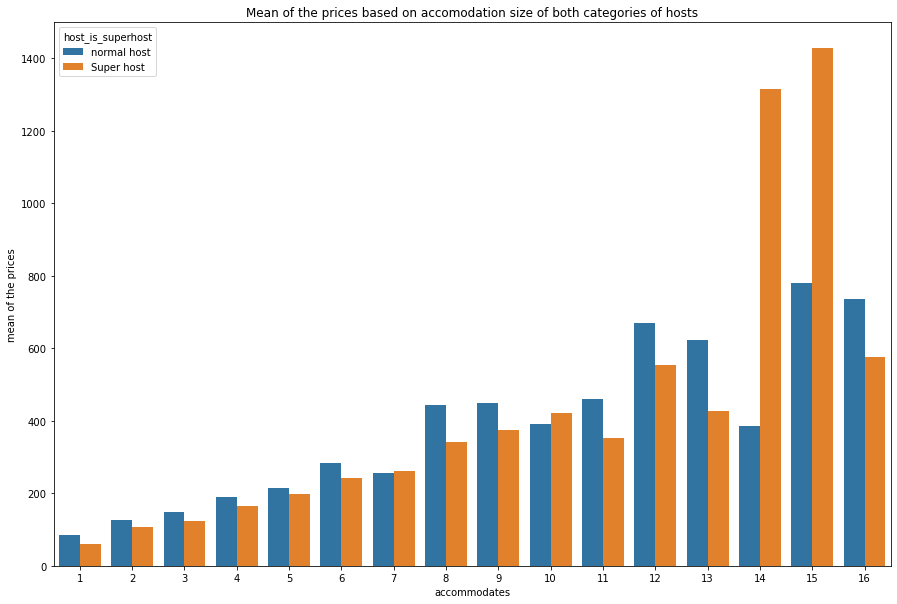

In [42]:
plt.figure(figsize = (15,10))

sns.barplot(x='accommodates',y='mean of the prices',data=price_processed3, hue = "host_is_superhost").set(title ='Mean of the prices based on accomodation size of both categories of hosts')


From the bar plot above, we can see that the mean price of listings of normal hosts is higher than that of super hosts. Super hosts may have maintained the prices of the listings low so that their listings are more likely to be booked frequently and get more reviews, maybe that's their stratergy to become the super hosts.
But, I cannot conclude that the mean price of listings of normal hosts is higher ( category of hosts have a jounce on the prices of the listings) because, we have seen that the count of listings of normal hosts is higher, maybe this might be the reason for the higher mean price of listings of normal hosts.
Having this in the sense, As I went over this analysis, I wondered whether, only the category of hosts has an impact on the price of the listings or are there any factors like the type of property, etc, which may also have an impact on the price of the listing? I will analyze the same as I go over milestones 4 and 5

In [44]:
cleanmean3.to_csv("../data/processed/cleanmean_Rohith.csv")

In [45]:
clean3.to_csv("../data/processed/clean_Rohith.csv")

In [46]:
price_temp.to_csv("../data/processed/price_Rohith.csv")

In [47]:
price_processed3.to_csv("../data/processed/PriceProcessed_Rohith.csv")